In [4]:
import pyvisa as visa
import matplotlib.pyplot as plt
import numpy as np
from scipy import stats
import os
import sys
rm = visa.ResourceManager()
print(rm.list_resources())

()


In [2]:
'''
Use the output from the above cell to rename the resources as necessary. The query commands ensure the keithleys
are online and listening
'''

Keithley = rm.open_resource('GPIB0::25::INSTR')
Keithleygate = rm.open_resource('GPIB0::26::INSTR')
print(Keithley.query('*IDN?'))
print(Keithleygate.query('*IDN?'))

KEITHLEY INSTRUMENTS INC.,MODEL 2400,1197267,C33   Mar 31 2015 09:32:39/A02  /K/J

KEITHLEY INSTRUMENTS INC.,MODEL 2400,1197271,C30   Mar 17 2006 09:29:29/A02  /K/J



Conductance: -7.457223387938791e-11 Siemens


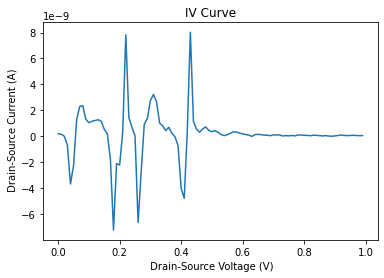

100


In [3]:
%run KeithleyIVSweep.py 0 1 0.01 test.txt source

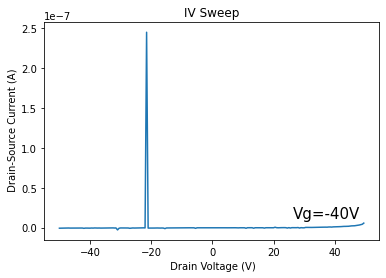

In [12]:
%run KeithleyIVSweepFixedGate.py -50 50 0.5 -40 P1_DCB_HMDS_2500_IdVd_Vgmin40.txt down

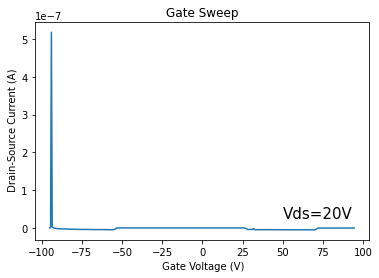

In [22]:
%run KeithleyGateSweepFixedDrain.py -95 95 0.5 20 P1_DCB_HMDS_2500_0mins_IdVg_V20_u.txt up

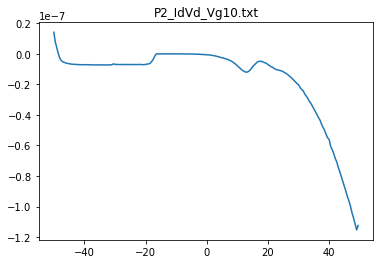

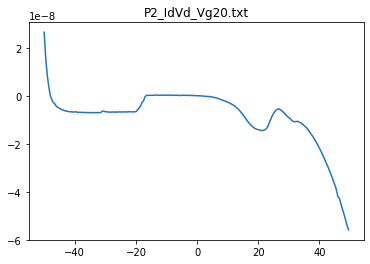

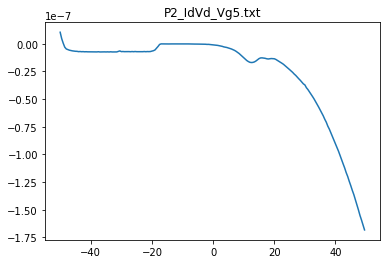

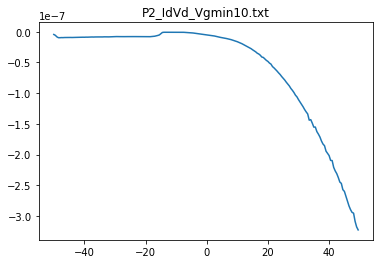

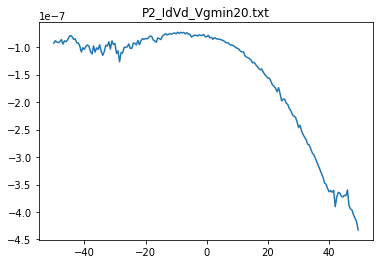

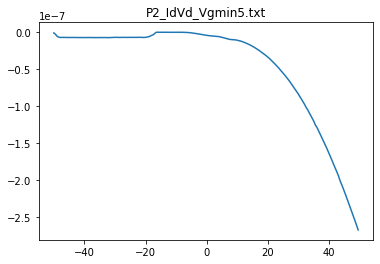

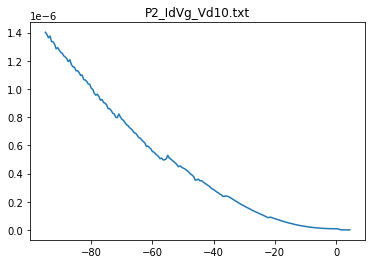

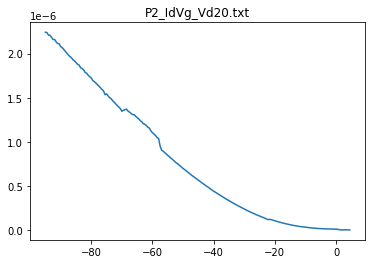

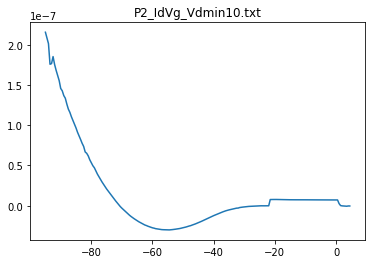

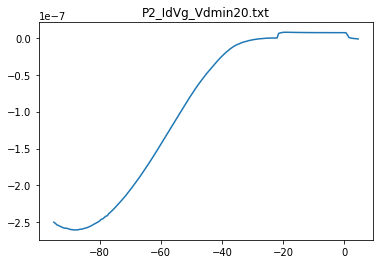

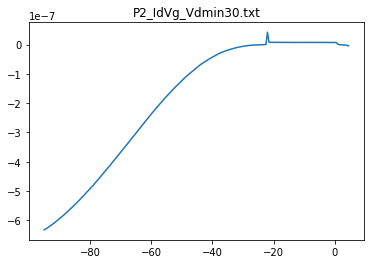

In [21]:
material = "P2"
for filename in os.listdir(os.getcwd() + '/data'):
    if material in filename:
        plt.figure()
        result = np.loadtxt(os.getcwd()+ '/data/' + filename)
        xval = result[0]
        yval = result[1]
        plt.plot(xval,yval)
        plt.title(filename)

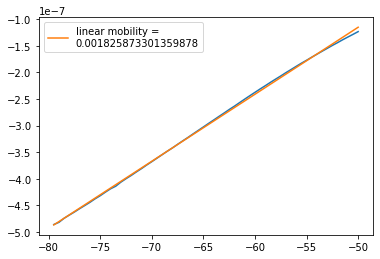

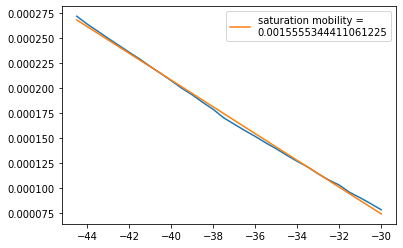

In [28]:
# use the above file names and plots to select a curve, and change start and stop positions to calculate linear mobility
filename = 'P2_IdVg_Vdmin30.txt'
result = np.loadtxt(os.getcwd()+ '/data/' + filename)
xval = result[0]
yval = result[1]

#input here parameters to calculate the mobility
L = 50        #50 micron channel length
W = 1000      #1000 micron channel width
Ci = 11.5e-9    #10 nF/cm^2 equation: permitivity of dielectric(sio2)*oxide layer thickness in cm (300nm)
Vd = 30     # Volt drain voltage

#input here the start and stop position of the region of interest for linear mobility
startpos = -80
stoppos = -50
mini = np.where(xval == startpos)[0][0]
maxi = np.where(xval == stoppos)[0][0]
if mini < maxi:
    xvalues = xval[mini:maxi]
    yvalues = yval[mini:maxi]
else:
    xvalues = xval[maxi:mini]
    yvalues = yval[maxi:mini]
slope, intercept, r_value, p_value, std_error = stats.linregress(xvalues, yvalues)
yregress = slope*xvalues+intercept
mu_lin = (abs(slope)*L)/(W*Vd*Ci)
plt.figure()
plt.plot(xvalues,yvalues)
plt.plot(xvalues,yregress, label = "linear mobility = \n" + str(mu_lin) )
plt.legend()

#input here the start and stop position of the region of interest for saturation mobility
startpos = -45
stoppos = -30
mini = np.where(xval == startpos)[0][0]
maxi = np.where(xval == stoppos)[0][0]
if mini < maxi:
    xvalues = xval[mini:maxi]
    yvalues = np.sqrt(abs(yval[mini:maxi]))
else:
    xvalues = xval[maxi:mini]
    yvalues = np.sqrt(abs(yval[maxi:mini]))
slope, intercept, r_value, p_value, std_error = stats.linregress(xvalues, yvalues)
mu_sat = (2*L)/(W*Ci)*(slope)**2
yregress = slope*xvalues+intercept
plt.figure()
plt.plot(xvalues,yvalues)
plt.plot(xvalues,yregress, label = "saturation mobility = \n" + str(mu_sat))
plt.legend()